# [AI 이노베이션 스퀘어] 11기 기본 저녁반
- github: https://github.com/hysKim1/AI_Fundamental
    -  [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
---


 * [1.ML 전반적 과정:지도학습의 Regression ](#ML-전반적-과정 ) <br>
      * [1.1 결측치 처리](#결측치-처리)<br>
          * [ fillna](#fillna)<br>
          * [ SimpleImputer](#SimpleImputer)<br>
          * [ KNNImputer](#KNNImputer)<br>
      * [1.2 문자열 처리:Encoding](#Encoding)<br>
          * [1.2.1 Label Encoding ](#Label-Encoding )<br>
              * [ map](#map)<br>
              * [ LabelEncoder](#LabelEncoder)<br>
          * [1.2.2 One-Hot Encoding](#One\-Hot-Encoding )<br>
              * [ get_dummies](#get_dummies)<br>
              * [ OneHotEncoder](#OneHotEncoder)<br>
      * [1.3  EDA  ](#EDA)<br>
          * [1.3.1 상관관계  ](#상관관계 )<br>
              * [ pairplot](#pairplot)<br>
              * [ corr](#corr)<br>
              * [ heatmap](#heatmap)<br>
     * [1.4 모델 분류](#모델-분류)<br>
          * [1.4.1 Parametric Model](#Parametric-Model)<br>
              * [LinearRegression](#LinearRegression)<br>
              * [KNeighborsRegressor](#KNeighborsRegressor)<br>
          * [1.4.2 Non-parametric Model](#Non\-parametric-Model)<br>
              * [DecisionTreeRegressor](#DecisionTreeRegressor)<br>
 * [2.평가 척도](#평가-척도)
      * [confusion_matrix](#confusion_matrix)<br>


---

## ML 전반적 과정
- 데이터 전처리
    - 결측치
    - encoding
- 데이터 분할
    - 데이터 양이 많으면 holdout (split)
    - 데이터 양 적으면 cross validation
- 모델 학습
    1. 지도학습
        - classification
        - regression
    2. 비지도 학습
    3. 강화 학습
- 성능 
    - classificaiton : accuracy
    - regression : R-squared
- 모델 선택


In [1]:
import seaborn as sns

In [3]:
import pandas as pd

In [12]:
mpg=sns.load_dataset('mpg')

다음과 같이 주어졌을때 머신러닝을 무엇을 해야할까?

### 지도학습 Regression
- 타겟값이 실수값 전체에 매핑됨.(특정 class로 분류 불가)
### mpg data
mpg 연비 예측
- 결측치 처리
    -  관측값으로 대체 : `fillna`
        - bfill
        - ffill
    -  계산 값으로 대체: `SimpleImputer`, `KNNImputer`
- 문자열 처리
    - `map`

In [4]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


## 결측치 처리
### 결측치 확인
- 시각화: `mino.matrix`
- `isna`, `isnull`

In [6]:
import missingno as mino

<AxesSubplot:>

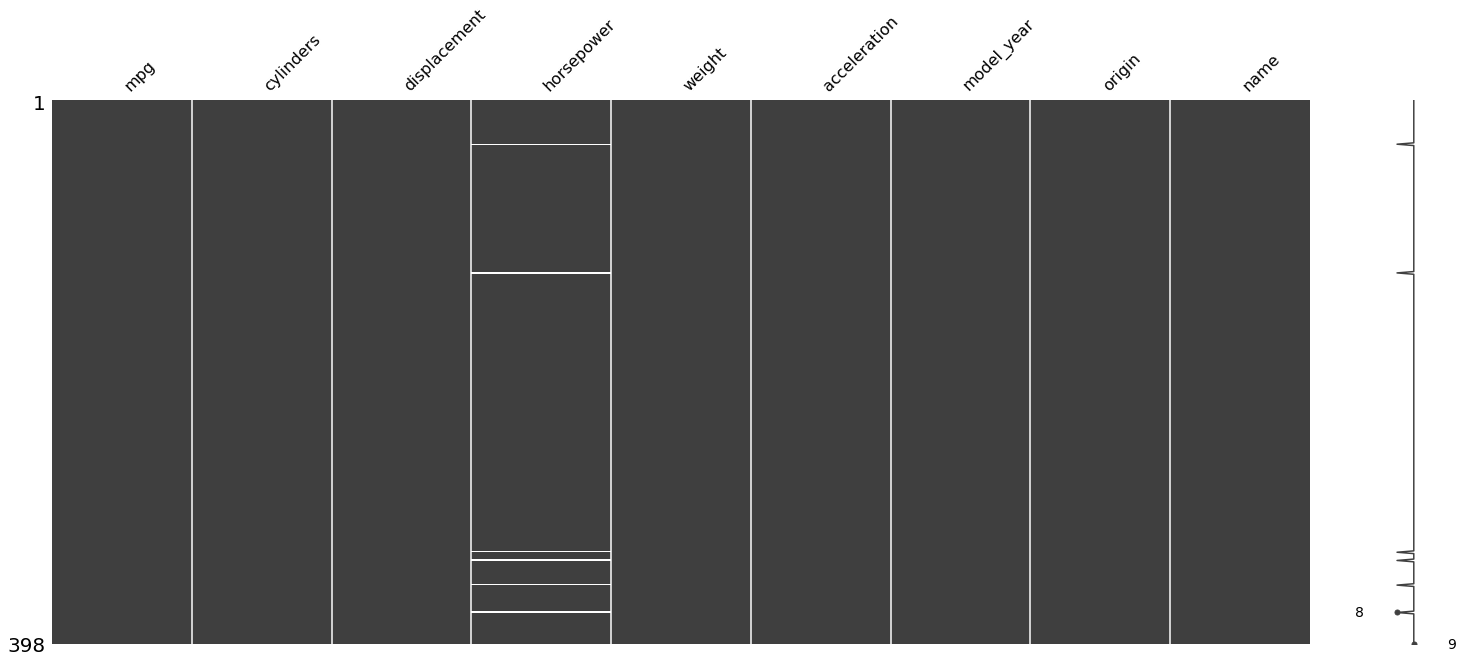

In [7]:
mino.matrix(mpg) #6개 결측치

In [8]:
mpg.horsepower.isna()

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Name: horsepower, Length: 398, dtype: bool

In [9]:
mpg.horsepower.isna().sum() #총 6개

6

boolean indexing을 이용하여 결측치 값들만 추출

In [13]:
mpg[mpg.horsepower.isna()] #6개 결측치 확인

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


## 결측치 대체
### fillna
- 결측치값을 이전 값이나 이후 값으로 대체
- 위의 index 를 이용하여 fillna의 결측치 대체하는 방법에 따라 어떻게 변하는지 확인
    - 32번의 결측치를 `fillna` 통해서 대체 

In [23]:
mpg.iloc[31:34]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
31,25.0,4,113.0,95.0,2228,14.0,71,japan,toyota corona
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
33,19.0,6,232.0,100.0,2634,13.0,71,usa,amc gremlin


31번 관측값의 horsepower 의 값 95를 32번 관측값의 결측치에 대체

In [24]:
mpg.horsepower.fillna(method='ffill').iloc[31:34]

31       95
32    ffill
33      100
Name: horsepower, dtype: object

33번 관측값의 horsepower 의 값 95를 32번 관측값의 결측치에 대체

In [22]:
mpg.horsepower.fillna('bfill').iloc[31:34]

31       95
32    bfill
33      100
Name: horsepower, dtype: object

In [25]:
mpg.horsepower.fillna('bfill',inplace=True)
mpg.iloc[31:34] 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
31,25.0,4,113.0,95,2228,14.0,71,japan,toyota corona
32,25.0,4,98.0,bfill,2046,19.0,71,usa,ford pinto
33,19.0,6,232.0,100,2634,13.0,71,usa,amc gremlin


### SimpleImputer
- 결측치를 평균으로 채움
- `SimpleImputer( strategy='mean')`
    - strategy 에 따라서 채우는 법 달라짐
        - mean(평균), median(중앙값),most_frequent(최빈값),constant(일괄적 채우기)

In [27]:
from sklearn.impute import SimpleImputer, KNNImputer

In [28]:
ss= SimpleImputer() #기본 평균갑 대체

In [44]:
mpg[['horsepower']]=ss.fit_transform(mpg[['horsepower']]) #fancy indexing

In [46]:
mpg.isna().sum() #각 행에 결측치 없음 

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

### KNNImputer
- 결측치의 최근접값 5개의 평균으로 대체
- `KNNImputer(n_neighbors=5)`

In [31]:
mpg=sns.load_dataset('mpg')

In [32]:
kk=KNNImputer()

중간에 소수점자리수 계산된 값 6개 있음

In [33]:
kk.fit_transform(mpg[['horsepower']])

array([[130.        ],
       [165.        ],
       [150.        ],
       [150.        ],
       [140.        ],
       [198.        ],
       [220.        ],
       [215.        ],
       [225.        ],
       [190.        ],
       [170.        ],
       [160.        ],
       [150.        ],
       [225.        ],
       [ 95.        ],
       [ 95.        ],
       [ 97.        ],
       [ 85.        ],
       [ 88.        ],
       [ 46.        ],
       [ 87.        ],
       [ 90.        ],
       [ 95.        ],
       [113.        ],
       [ 90.        ],
       [215.        ],
       [200.        ],
       [210.        ],
       [193.        ],
       [ 88.        ],
       [ 90.        ],
       [ 95.        ],
       [104.46938776],
       [100.        ],
       [105.        ],
       [100.        ],
       [ 88.        ],
       [100.        ],
       [165.        ],
       [175.        ],
       [153.        ],
       [150.        ],
       [180.        ],
       [170

## 문자열 처리
### Encoding
- **문자열을 숫자열로 변환**

크기/순서 여부에 따른 방식이 다름

   - nominal(one-hot encoding)
        - 크기/ 순서 없음
        - 1 이 한개만 있는 열로 변경( 갯수=열 갯수)
            - 차원 증가
            - 예.강아지(1,0,0), 고양이(0,1,0),...
   - ordinal(label encoding)
        - 크기/순서가 생김.
      - 예. M :1 ,L:2  XL:3


origin, name은 object이므로 수치형으로 바꿔야함

In [53]:
mpg.info()# object -> int or float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [54]:
mpg.origin.value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

## Label Encoding

- `map`
    - 사용자 지정
- `LabelEncoder`
    -  오름차순으로 정렬하여 자동 지정

### map
사용자가 지정함

In [55]:
mpg.origin.map({'usa':0,'japan':1,'europe':2})

0      0
1      0
2      0
3      0
4      0
      ..
393    0
394    2
395    0
396    0
397    0
Name: origin, Length: 398, dtype: int64

### LabelEncoder
- 알파벳 오름차순으로 할당

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le=LabelEncoder()  #인스턴스화

In [36]:
mpg.origin.value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [38]:
le.fit_transform(mpg[['origin']])

/Users/MG/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 0,
       2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       1, 2, 2, 2, 2, 0, 1, 1, 2, 0, 2, 0, 1, 0, 2, 2, 2, 2, 1, 2, 0, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1, 0, 1,
       0, 1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 0, 2,

#### inverse_transform
ransform labels back to original encoding.
라벨링으로 변경한것을 이전의 인코딩으로 다시 변경
- europe, japan,usa 에서 0,1,2로 바뀐것을 다시 원래의 값인 europe, japan,usa 바꿔줌

In [39]:
le.inverse_transform([2,1,0]) 

array(['usa', 'japan', 'europe'], dtype=object)

## One-Hot Encoding
- 각 행별로 해당 값에 1이고 나머지는 0
    - `str.get_dummies()`
    -  `OneHotEncoder`
    
### get_dummies
- 통계에서는 dummy/indicator variable 이라 불림
- pandas의 string method str에서 제공
- 알파벳 오름차순으로 할당
    - 유럽: (1,0,0)
    - 일본: (0,1,0)
    - 미국: (0,0,1)

0번째 값은 미국 ( 0,0,1)
.
.
. 
394번째 값은 europe (1,0,0)

In [73]:
mpg.origin.str.get_dummies()

,europe,japan,usa
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
393,0,0,1
394,1,0,0
395,0,0,1
396,0,0,1


### OneHotEncoder
- 알파벳 오름차순으로 할당

In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
oe= OneHotEncoder(sparse=True) #기본 옵션

In [42]:
oe.fit_transform(mpg[['origin']])

<398x3 sparse matrix of type '<class 'numpy.float64'>'
	with 398 stored elements in Compressed Sparse Row format>

sparse matrix: 행렬 내의 원소값에 0이 많아 압축해서 저장하는 방식의 매트릭스

`toarray`행렬로 변경

In [85]:
oe.fit_transform(mpg[['origin']]).toarray()

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [43]:
oe= OneHotEncoder(sparse=False) #toarray변환 불필요

In [44]:
oe.fit_transform(mpg[['origin']])

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [45]:
oe.inverse_transform([[1,0,0]])

array([['europe']], dtype=object)

### Feature Selection
- 모델의 성능에 크게 도움을 주는 featrues를 선택하는것

- 결측치 처리, 인코딩을 통한 전처리 과정 완료
- 하단에서는 예시로 넘어가기위해 mpg데이터의 object인 name열 제거
    - 나중에 선택 방법을 다룰 예정
    - `drop(columns= )`
    - `drop(labels= , axis=)`

In [46]:
mpg.name.value_counts() #큰 패턴이 없으므로 제거

ford pinto                          6
toyota corolla                      5
ford maverick                       5
amc matador                         5
chevrolet chevette                  4
                                   ..
chevrolet nova custom               1
chevrolet woody                     1
amc pacer d/l                       1
chevrolet chevelle concours (sw)    1
dodge monaco (sw)                   1
Name: name, Length: 305, dtype: int64

In [90]:
mpg.name.nunique() #305개의 고유한 값을 갖고 있음 

305

In [91]:
mpg.drop(columns='name',inplace=True) #제거 

In [92]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa
394,44.0,4,97.0,52.0,2130,24.6,82,europe
395,32.0,4,135.0,84.0,2295,11.6,82,usa
396,28.0,4,120.0,79.0,2625,18.6,82,usa


## EDA 


### diabetes data
- 442 명의 당뇨병환자로 부터 age, sex, body mass index, average blood
pressure, and six blood serum 의 10가지 변수 이용하여 당뇨 예측

In [49]:
from sklearn.datasets import load_diabetes

In [50]:
db=load_diabetes()

In [51]:
print(db.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

아래의 기본 처리과정은 이제 외워야합니다.

In [52]:
diabetes= pd.DataFrame( db.data, columns=db.feature_names)

In [53]:
diabetes['target']= db.target

In [54]:
diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [55]:
diabetes.info()  #결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [56]:
diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


#### boxplot
변수들의 분포는 일정

<AxesSubplot:>

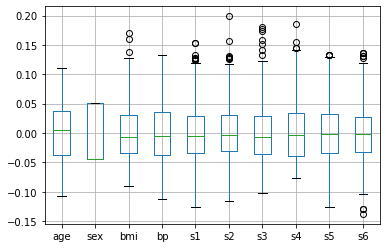

In [57]:
diabetes.iloc[:,:-1].boxplot()

### pairplot
- 변수별 산점도를 통한 상관관계와 분포 확인
    - 산점도: 직교 좌표계를 이용하여 변수간의 관계를 보여줌
    - 분포: 각 변수별로 분포 형태를 보여줌

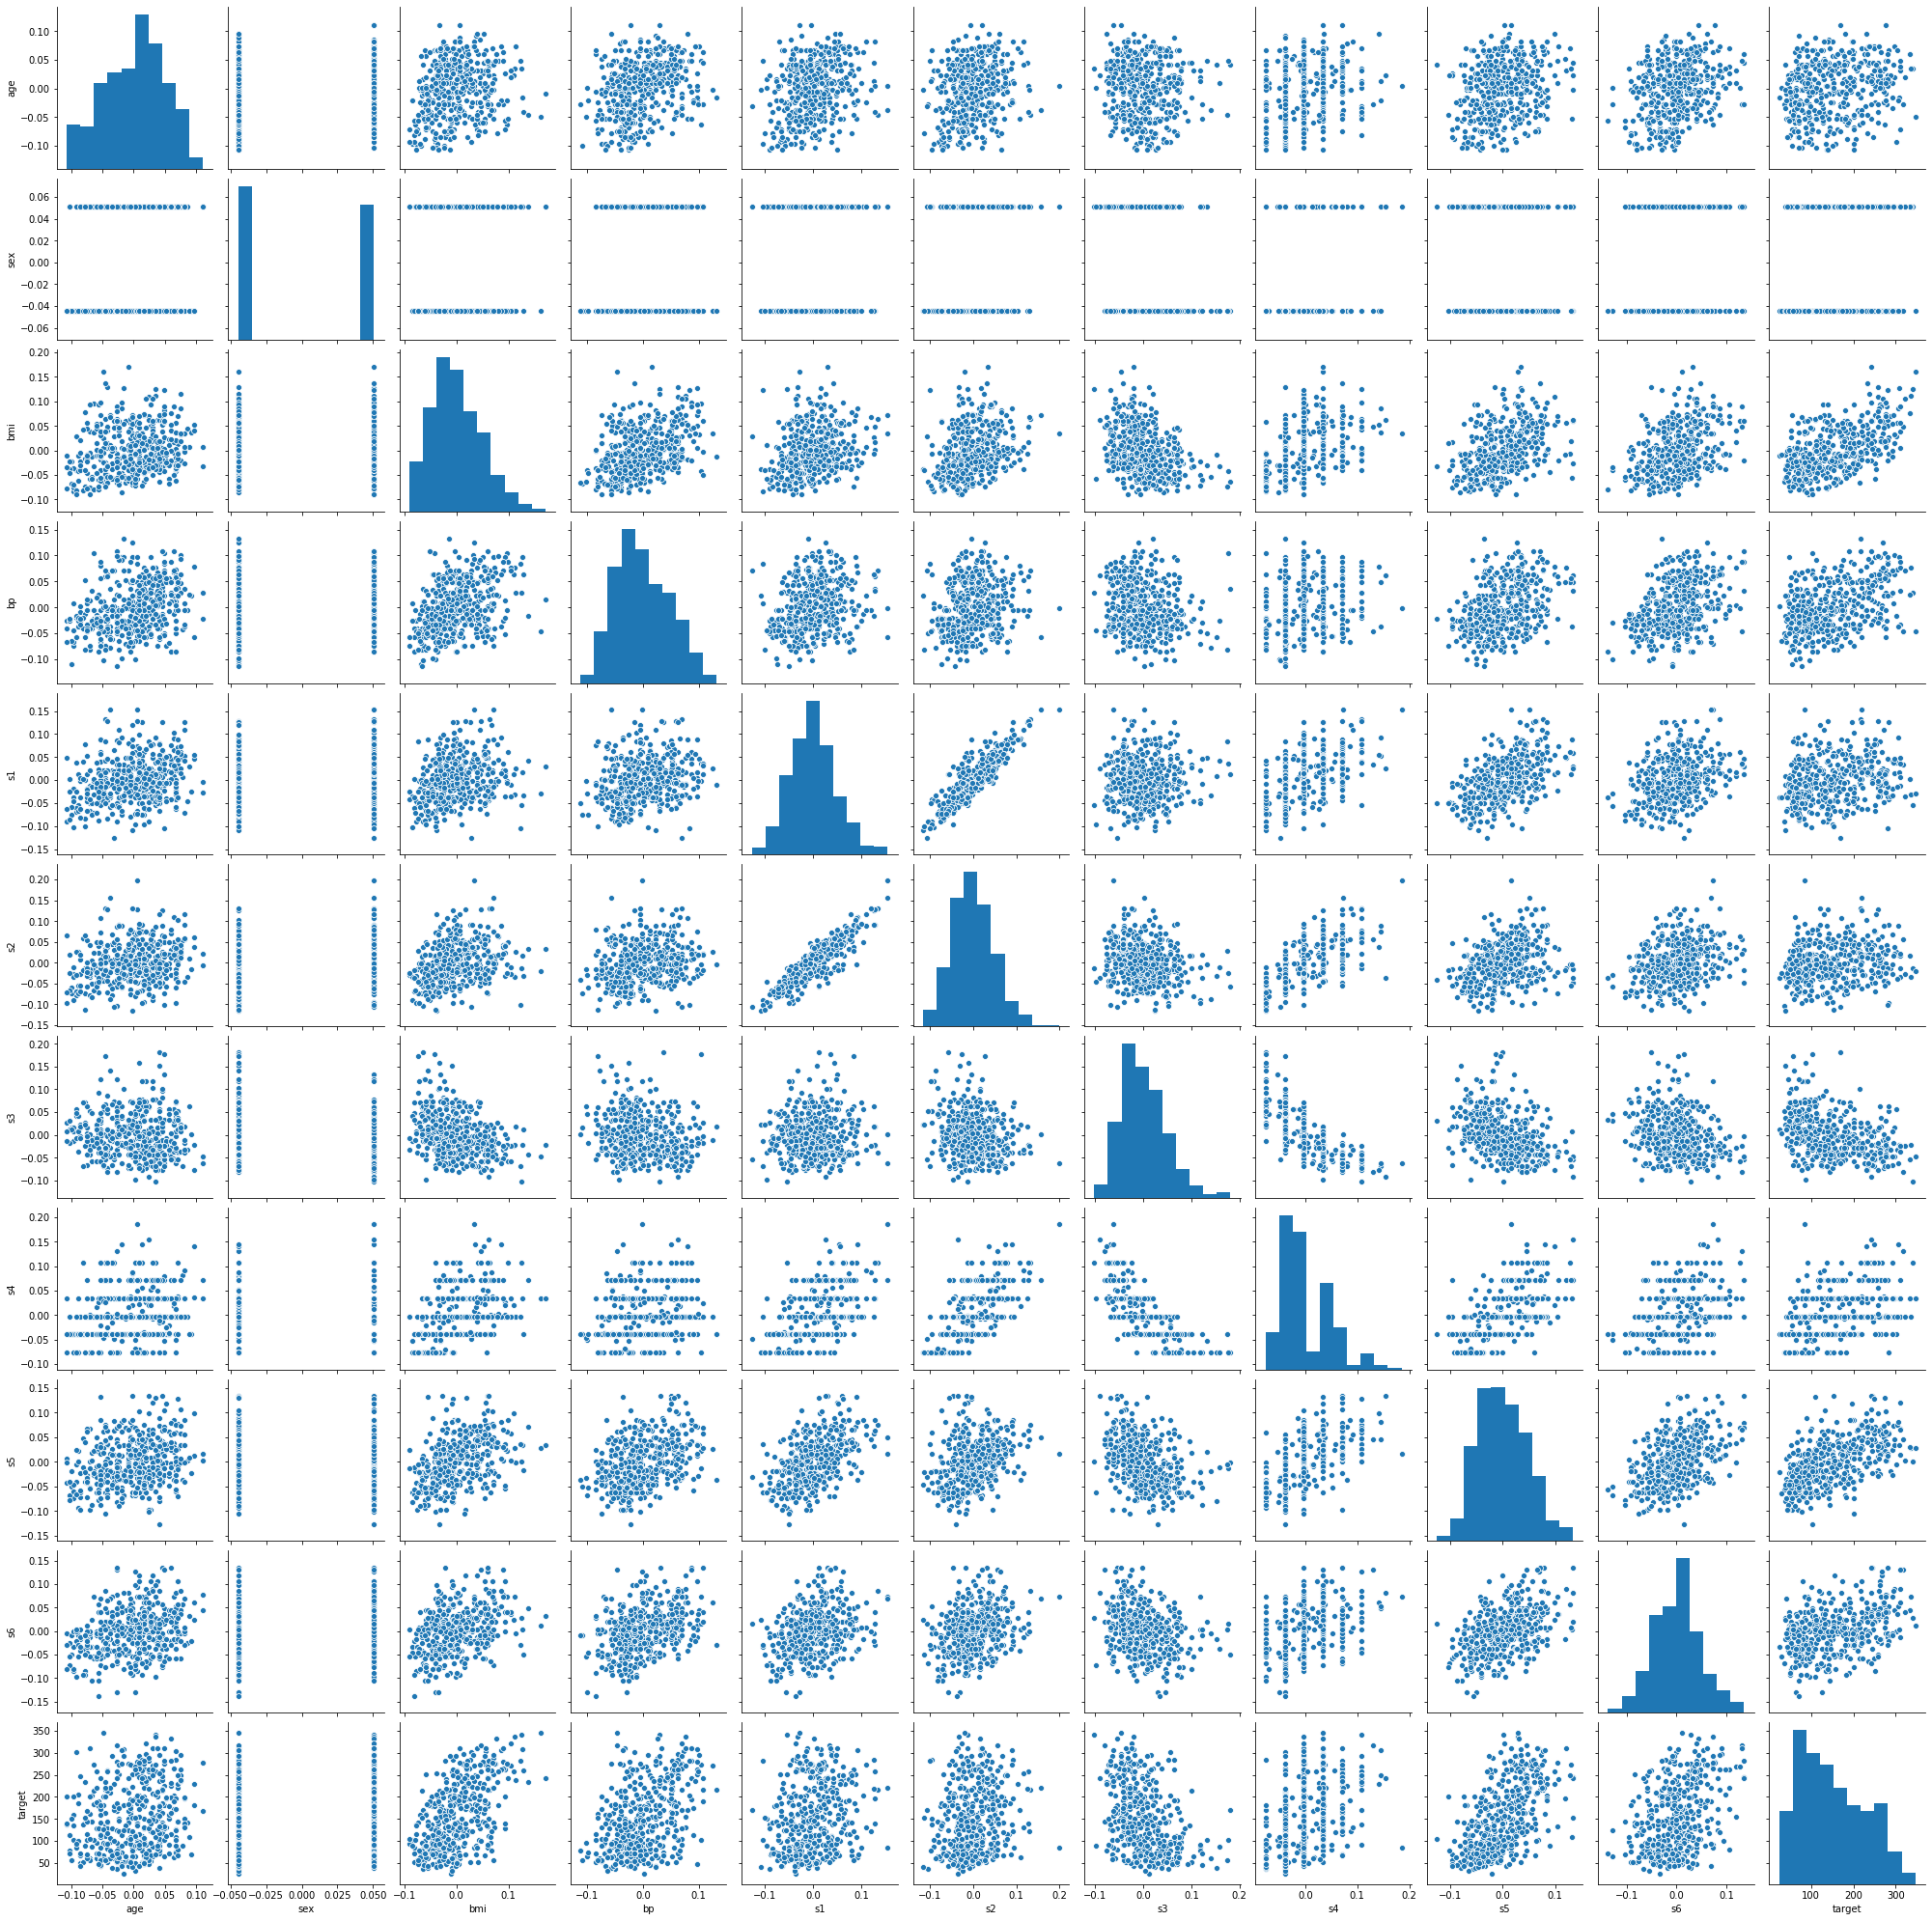

In [122]:
sns.pairplot(diabetes) #class가 아니라서 구분 못함.

* 5번쨰와 6번째에 강한 양의 상관관계가 있음 (선에 가까움)

### 상관관계
### corr
- 각 변수간의 상관성 정도 확인 
    - 추천 시스템 만들기에서 사용했었음

In [58]:
diabetes.corr() 

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


### 상관관계 시각화
### heatmap
- `heatmap( data.corr(),annot=True)`
    - annot =True:데이터값을 각 셀에 표시
    - cbar =True : heatmap의 옆에 색상별로 무엇을 의미하는지 표시하는 colorbar 유지

<AxesSubplot:>

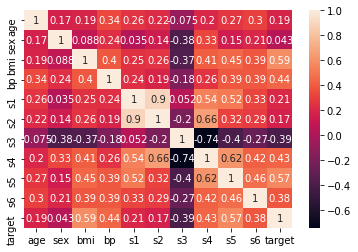

In [59]:
sns.heatmap(diabetes.corr(),annot=True)

colorbar 없애기.

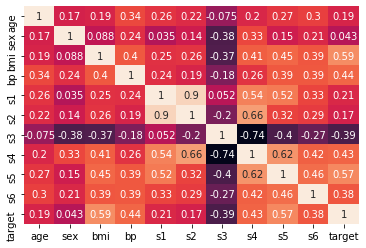

In [126]:
sns.heatmap(diabetes.corr(),annot=True,cbar=False)

- figsize는 pandas에서는 가능 , seaborn 불가...
- seaborn은 state machine 방식으로 사이즈 조절

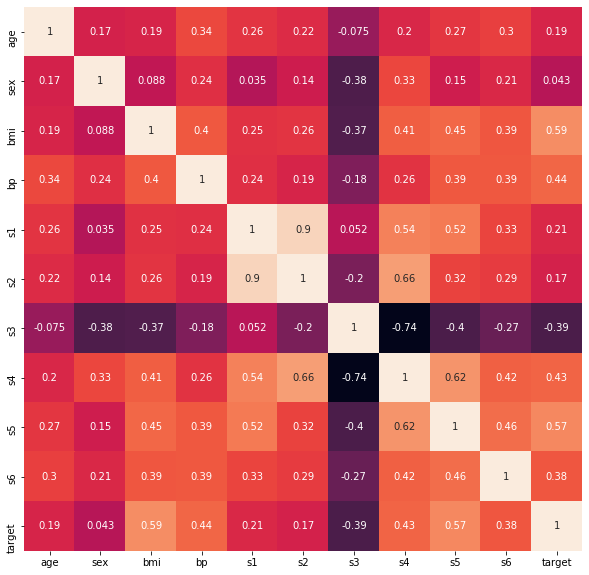

In [132]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))  #state machine 방식
sns.heatmap(diabetes.corr(),annot=True,cbar=False)

* 위의 pairplot과 heatmap을 통해서 상관관계가 아주 큰 feature 발견: s1,s2
    - pairplot : 선형에 가까움
    - heatmap: 상관계수가 1에 가까움 0.9(강한 양의 상관관계)
        - 다중공선성 문제가 발생 가능
            - 성능과 추정에 영향을 줌.
* 데이터에 따라 featrue 제거하거나 결합

## model 분류

머신러닝을 분류하는 방법
1. linear vs  nonlinear
    - 모델의 decision boundary가 직선인지 아니면 좀 더 복잡한지
        - 비직선은 직선을 포함하는 관계이기 때문에 복잡이라고 표현.
             - 직선 :$y = ax+ b$
             - 비직선 $y = cx^2+ ax+b$
                 - 위의 2차식에서 c=0인경우 직선식이 되기 때문
        > 오캄의 면도날 : 모델은 간단할 수록 좋다(단순성의 원리)
            - 동일한 성능을 내는 경우 간단한 모델
            - 대부분 복잡한 모델이 성능이 월등
            
2. parametric vs nonparametric
    - 모델이 정해져 있고 정해진 파라미터만 찾음   
    
    Parametric model

    - 전통적인 통계 방법
    - 예. 선형 회귀( linear Regression) : $y = ax+ b$ 와 같이 식으로 모델링
        - parameter : $a$, $b$
        - $a$, $b$ 로 데이터를 표현할 수 있을 것이라 가정
            - 가정이 틀리면 모델도 틀림.
        - 설명하기 좋음.

    non-parametric model
    - Computer Science(CS) 방법
    - parameter를 가정하지 않고 모델링
    - 데이터로부터 정해진 모델없이 생성되는 모델
        - 성능은 parametirc model 보다 더 우수
        - 설명 어려움( black box model)

###  Hyper-parameter
- 알고리즘의 hyper-parameter에 따라서 **성능이 달라짐**
- 이제는 각 모델의 **하이퍼파라미터**도 조정하여 성능 조절
    - 최적의 하이퍼파라미터를 찾는 방법도 존재(나중에 다룰 예정)

목표 : 성능 좋은 모델 + 하이퍼 파라미터 조정

 parameter vs hyper-parameter
   * hyper-parameter는 사람이 지정하며 성능에 큰 영향 줌
   * parameter는 기계가 알아서 찾음.


### Model selection 
**성능 비교** 위해서 해당 데이터에 가장 최적인 모델을 찾기 위해 다양한 모델 중에서 선택
- No Free Lunch Theorem ( 모든 데이터에 최적인 알고리즘 없음)

### Parametric Model
### LinearRegression
- `LinearRegression(fit_intercept=True)`
   * Hyperparameter: 
     - fit_intercept : 모델의 절편 계산할지 여부
- n_jobs : cpu core 사용하는 갯수(기본 1개)
     -  n_jobs=-1 : 모든 프로세서를 다 사용

In [118]:
from sklearn.model_selection import train_test_split, cross_val_score
train_X, test_X, train_y,test_y= train_test_split( diabetes.iloc[:,:-1],diabetes.target)

In [119]:
from sklearn.linear_model import LinearRegression

In [120]:
lr=LinearRegression()

In [121]:
lr.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [122]:
lr.score(test_X,test_y)

0.4632300115796374

### KNeighborsRegressor
- `KNeighborsRegressor(n_neighbor=5)`
   * Hyperparameter: 
       - n_neighbors =5 :최근접이웃 데이터 5개를 이용하여 회귀

In [70]:
from sklearn.neighbors import KNeighborsRegressor

In [71]:
knn=KNeighborsRegressor() #n_neighbors=5 기본 

In [72]:
knn.fit(train_X,train_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [73]:
knn.score(test_X,test_y) 

0.32059306270619947

In [78]:
#하이퍼파라미터 조정 : n_neighbors =10으로 조정하니 성능 올라감.
knn=KNeighborsRegressor(n_neighbors=10)
knn.fit(train_X,train_y)
knn.score(test_X,test_y) 

0.41011167596700104

- 해당 데이터에서는 두 모델의 R^2 너무 낮음..
- 그나마 선형회귀분석이 나음

In [79]:
lr.score(test_X,test_y)  #R^2=0.4267

0.42665654158039157

In [81]:
knn.score(test_X,test_y)  #R^2=0.410

0.41011167596700104

### Non-parametric Model
- 어떤 데이터의 모델과 다른 데이터의 모델이 다름
- 데이터 마다 모양이 다름
    - 딥러닝, decision tree
    ---
- anaconda prompt 이용해서 설치 필요
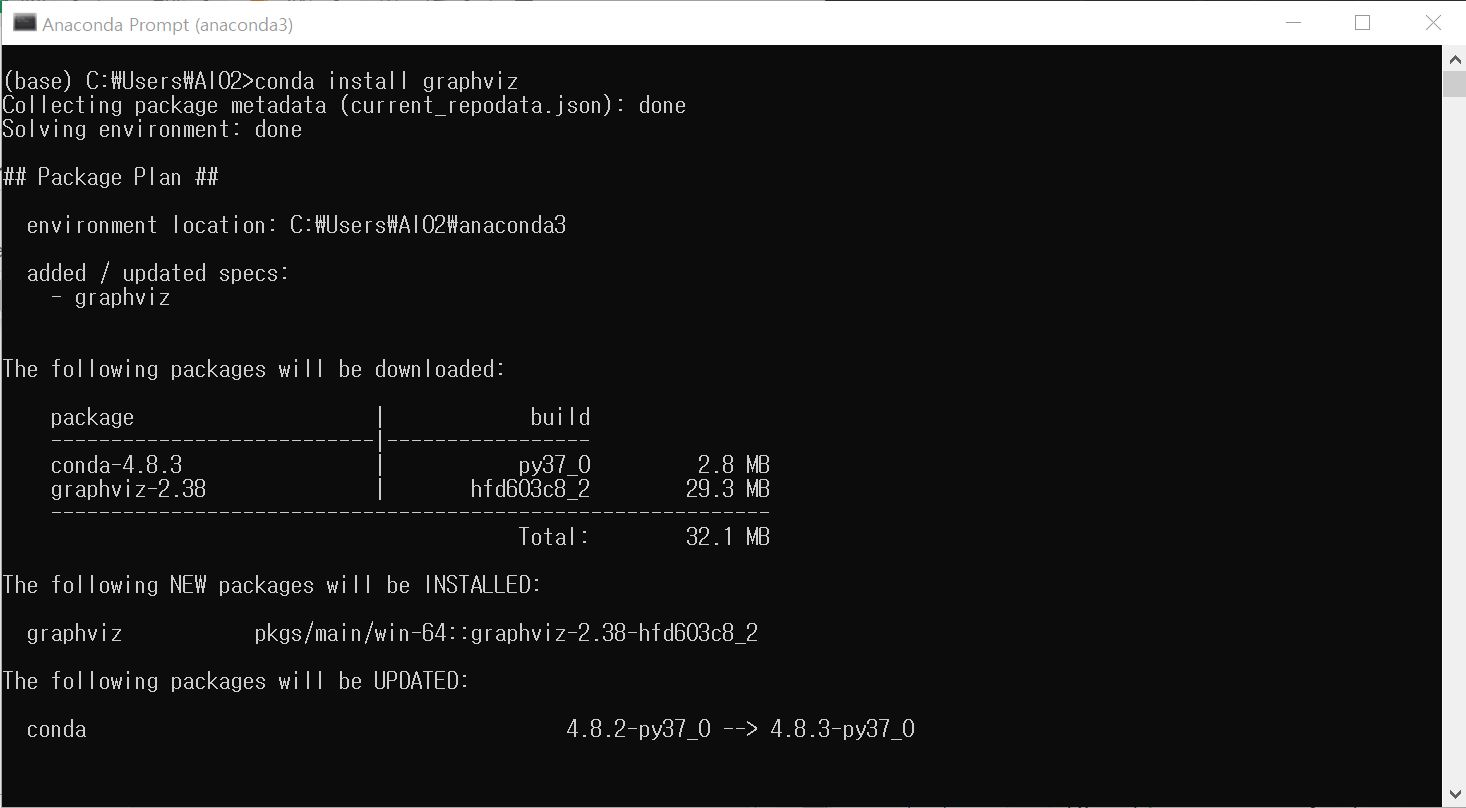

### DecisionTreeRegressor
- non linear
- 알고리즘 : 
    - 전체를 잘 구분할 수 있는 기준으로 쪼갬
    - 서브그룹(node)을 잘 구분 할 수있는 기준을 쪼갬..... 반복
    - 모든 데이터를 분류할때까지 쪼갬.
- 모델의 복잡도에 따라 과적합 현상 일어남
- 해당 과적합을 방지하는 하이퍼파라미터가 있음
    - Hyperparmeter : 
        - `min_samples_leaf `: 각 잎이 되기위해(쪼개지기 위해) 필요한 최소의 샘플의 갯수(기본 1)
        - `max_depth`: 나무의 최대 깊이를 제한(기본 2)

In [82]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [83]:
dt=DecisionTreeRegressor()

In [84]:
dt.fit(train_X,train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [85]:
dt.score(test_X,test_y)

-0.22671048797072824

[Text(171.67569659442725, 211.4, 'X[8] <= -0.006\nmse = 6008.065\nsamples = 331\nvalue = 154.668'),
 Text(94.79953560371517, 199.32, 'X[2] <= 0.008\nmse = 3276.552\nsamples = 158\nvalue = 111.892'),
 Text(65.92058823529412, 187.24, 'X[5] <= 0.091\nmse = 2284.678\nsamples = 123\nvalue = 98.854'),
 Text(50.81888544891641, 175.16, 'X[6] <= 0.021\nmse = 1978.366\nsamples = 121\nvalue = 96.496'),
 Text(23.379566563467495, 163.07999999999998, 'X[9] <= -0.032\nmse = 2616.949\nsamples = 60\nvalue = 110.133'),
 Text(13.532507739938081, 151.0, 'X[0] <= -0.062\nmse = 1317.758\nsamples = 23\nvalue = 87.739'),
 Text(5.988854489164087, 138.92000000000002, 'X[1] <= 0.003\nmse = 854.98\nsamples = 7\nvalue = 122.857'),
 Text(3.685448916408669, 126.84, 'X[2] <= -0.071\nmse = 80.0\nsamples = 4\nvalue = 146.0'),
 Text(1.8427244582043345, 114.75999999999999, 'X[3] <= -0.05\nmse = 16.0\nsamples = 2\nvalue = 138.0'),
 Text(0.9213622291021673, 102.67999999999999, 'mse = 0.0\nsamples = 1\nvalue = 142.0'),
 Tex

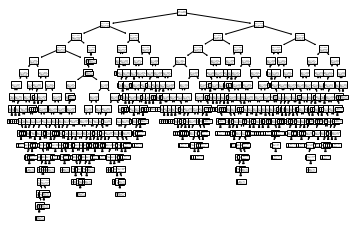

In [188]:
plot_tree(dt) #엄청나게 복잡한 그래프 생성됨.

위의 예시가 너무 복잡하여 비교하기 힘드므로 iris 이용

In [86]:
import seaborn as sns

In [87]:
iris =sns.load_dataset('iris')

In [88]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [100]:
dt=DecisionTreeClassifier(max_depth=3, min_samples_leaf=2) #option

In [101]:
dt.fit( iris.iloc[:,:-1], iris.species)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

- Root : 화살표 시작하는 노드
- 나무의 깊이 3개
- 각 잎의 샘플은 2개 보다 많음 `samples=값`

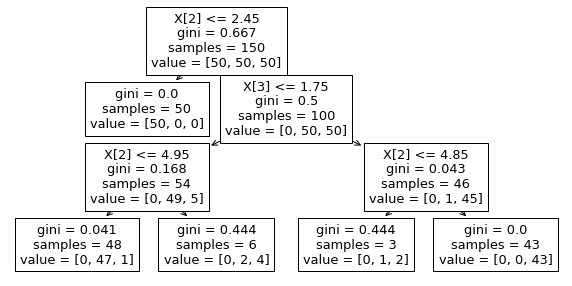

In [102]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plot_tree(dt);

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split

## 평가 척도 
### score 
- classification: accuracy 
- regression : R^2

### confusion_matrix
- classification 모델의 정확도(accuracy) 평가를 행렬로 표현
   - 행: 실제 값
   - 열: 예측 값
       - True/False: 예측이 맞는지 틀린지
       - Positive/Neagetive : 클래스로 여기면 됨.
 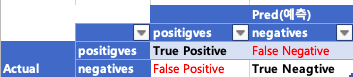
 
   
   - **행렬의 대각원소**(대각선에 위치한 값 예. 1행 1열, 2행2열...): **실제와 예측 맞음**
        - **True** positives : 실제 positive 인데  맞춤 (True,True)
        - **True** negatives : 실제 negative 인데  맞춤(False,False)
   - 그외에 위치한 원소: **예측 틀림**
        - **False** positives: 실제 positive 인데  틀림
        - **False** negatives: 실제 negative 인데 틀림
        
* 이를 이용해서 다양한 평가 지표 이용 가능(예. Recall, Precision, Specificity)

In [103]:
from sklearn.metrics import classification_report,confusion_matrix

In [104]:
confusion_matrix

<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None, normalize=None)>

In [112]:
iris.species.valu

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [105]:
dt=DecisionTreeClassifier(max_depth=2) #option

In [106]:
dt.fit( iris.iloc[:,:-1], iris.species)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [107]:
train_X,test_X,train_y,test_y= train_test_split(iris.iloc[:,:-1],iris.species)

In [108]:
confusion_matrix(test_y,dt.predict(test_X))  # 행렬의 대각 선은 다맞춤, 2번쨰 행의 1개와 3번쨰 행 1개 틀림.

array([[12,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 11]])

위의 혼동행렬(confusion matrix)를 이해를 돕기 위해 다음과 같이 표현
- setosa의 실제 값 12개는 예측 모두 맞음.
- versicolor의 실제값 15개는 14개는 예측이 맞으나 1개(붉은색)는 virginica로 예측됨(틀림)
- virginica의 실제 값 11개는 예측 모두 맞음.

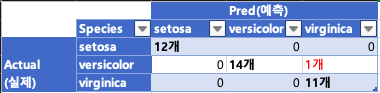

In [109]:
dt.predict(test_X)==test_y #틀린값 index: 70

85      True
50      True
17      True
135     True
128     True
29      True
16      True
148     True
68      True
92      True
28      True
113     True
122     True
46      True
43      True
86      True
18      True
130     True
53      True
98      True
87      True
121     True
35      True
37      True
140     True
51      True
64      True
70     False
26      True
102     True
73      True
146     True
101     True
4       True
89      True
94      True
36      True
77      True
Name: species, dtype: bool

예측 무엇으로 틀렸는지 확인 
70번째의 versicolor를 virginica로 예측함

In [110]:
dt.predict([test_X.loc[70]]) 

array(['virginica'], dtype=object)